# Code Setup

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

In [2]:
SET_FIT_INTERCEPT = True

boston_input = pd.read_csv('boston.csv')
boston = boston_input.drop('neighborhood', 1)

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [5]:
#any missing values?
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

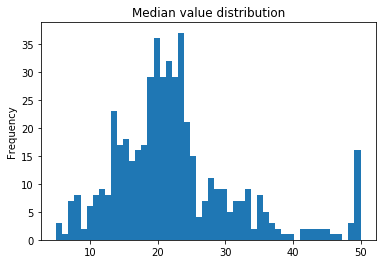

In [6]:
#median value distribution
boston['mv'].plot.hist(bins = 50)
plt.title('Median value distribution')
plt.show()

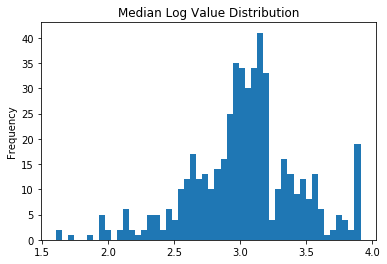

In [7]:
#distribution of the log of median home value
log = np.log(boston['mv'])

log.plot.hist(bins = 50)
plt.title('Median Log Value Distribution')
plt.show()

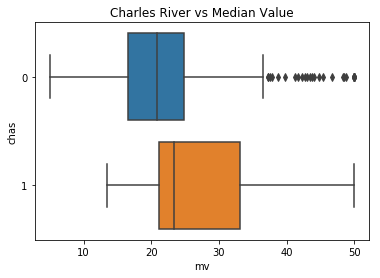

In [8]:
#does being by the river matter?
sns.boxplot(x='mv',y='chas',data = boston, orient = 'h')
plt.title('Charles River vs Median Value')
plt.show()

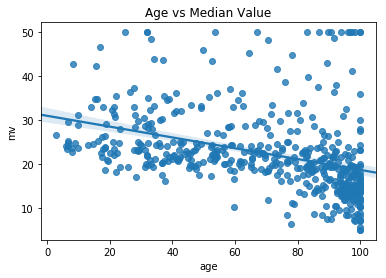

In [9]:
#compare median value to age
sns.regplot(x='age', y='mv', data = boston)
plt.title('Age vs Median Value')
plt.show()

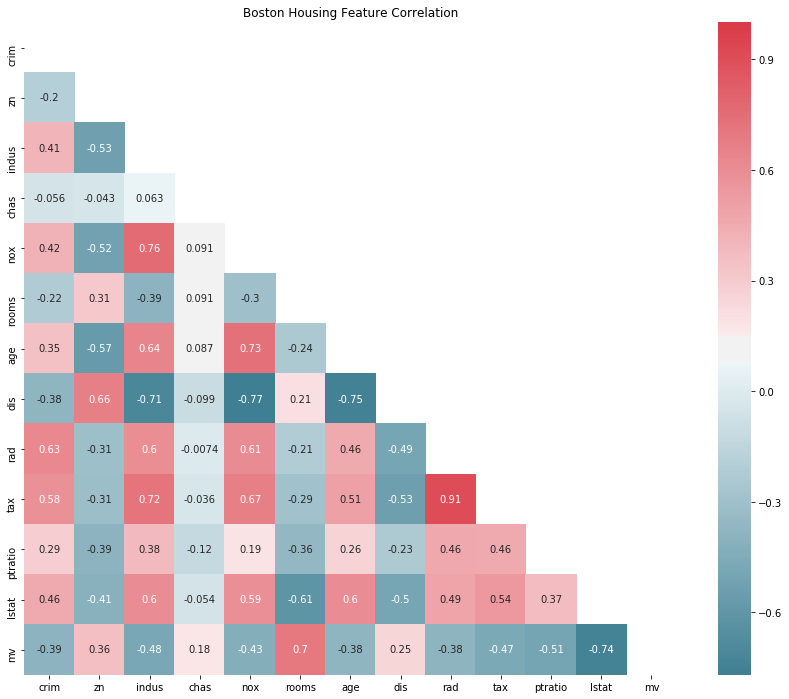

In [15]:
#what is the correlation between features?
corr = boston.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
color = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize = (15,12))
sns.heatmap(corr, mask = mask, cmap = color, square = True, annot = True)
plt.title('Boston Housing Feature Correlation')
plt.show()

In [16]:
#separate X and y from data set
#define random state
#define train and test sets

X = boston.drop('mv', axis = 1)
y = boston['mv']

random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed)

In [23]:
#define functions that will be used

#Cross validation function
#a, b are start and end of range for # of folds
#x, y are the data
def crossval(model, x, y, a, b):
    error = []
    for i in range(a,b):
        scores = cross_val_score(model, x, y, cv = i, scoring = 'neg_mean_squared_error')
        error_mean = -scores.mean()
        rmse = sqrt(error_mean)
        error.append(rmse)
    sns.scatterplot(x = range(a,b), y = error)
    plt.title('Cross Validation Fold Means')
    plt.xlabel('kFolds')
    plt.ylabel('Mean RMSE')
    plt.show()
      

#learning curves
def learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_seed)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
    

def prediction (model, X, y): #x and y values are test data sets
    predict = model.predict(X)
    mse = mean_squared_error(y, predict)
    rmse = sqrt(mse)
    print('RMSE: {:.3f}'.format(rmse))
    sns.regplot(y, predict, lowess=True, color = 'g')
    plt.title('Actual vs Prediction Plot')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')

def feature(model):
    importance = model.feature_importances_
    features = list(X)
    order = np.argsort(importance)

    plt.title('Feature Importance')
    plt.barh(range(len(order)), importance[order], color='b', align='center')
    plt.yticks(range(len(order)), [features[i] for i in order])
    plt.xlabel('Relative Importance')
    plt.show()

In [45]:
#enough with the warnings
import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = UserWarning)

# Linear Regression

In [24]:
lr = LinearRegression(fit_intercept = SET_FIT_INTERCEPT)

lr.fit(X_train,y_train)

print('Training set R-squared: {:.3f}'.format(lr.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(lr.score(X_test, y_test)))

Training set R-squared: 0.745
Test set R-squared: 0.689


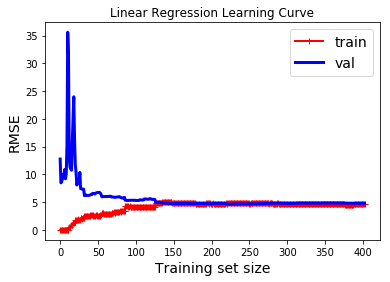

In [66]:
#plot learning curve
learning_curve(lr, X, y)
plt.title('Linear Regression Learning Curve')
plt.savefig('Linear Rgression Learning Curve.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

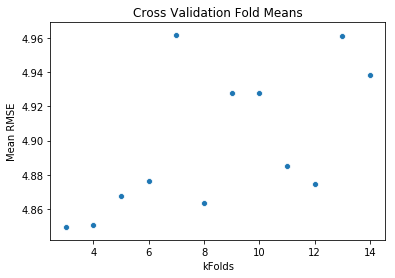

In [8]:
#look at cross validation scores for different numbers of folds
crossval(lr, X_train, y_train, 3, 15)

Linear Regression Predictions:
RMSE: 4.790


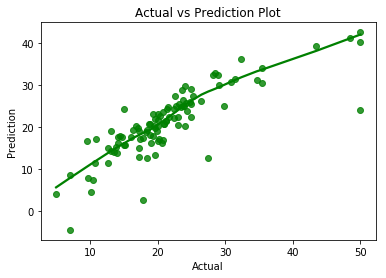

In [25]:
#define final linear regression RMSE
lr_pred = lr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, lr_pred))
lr_fin = rmse #for final results


print('Linear Regression Predictions:')
prediction(lr, X_test, y_test)


# Ridge Regression

In [26]:
#fit regular model
r = Ridge(fit_intercept = SET_FIT_INTERCEPT)

r.fit(X_train, y_train)
print('Training set R-squared: {:.3f}'.format(r.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(r.score(X_test, y_test)))

Training set R-squared: 0.742
Test set R-squared: 0.685


In [27]:
#show initial error
r_pred = r.predict(X_test)
mse = mean_squared_error(y_test, r_pred)
rmse = sqrt(mse)

print('Ridge RMSE: {:.3f}'.format(rmse))

Ridge RMSE: 4.819


In [28]:
#use grid search to optimize alpha

param_val = {'alpha':[10, 5, 2, 1, .1, .01, .001]}
r_grid = GridSearchCV(r, param_val, scoring = 'neg_mean_squared_error', cv=10)
r_grid.fit(X_train, y_train)
grid_alpha = r_grid.best_params_


#refit model with best alpha
r = Ridge(alpha = grid_alpha['alpha'])
r.fit(X_train, y_train)

print('Training set R-squared: {:.3f}'.format(r.score(X_train, y_train)))
print('Test set R-squared: {:.3f}'.format(r.score(X_test, y_test)))

Training set R-squared: 0.745
Test set R-squared: 0.689


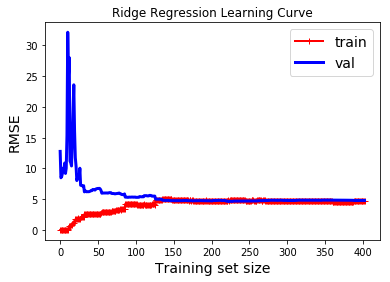

In [72]:
learning_curve(r, X, y)
plt.title('Ridge Regression Learning Curve')
plt.savefig('Ridge Regression Learning Curve.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

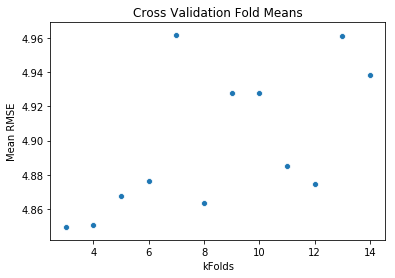

In [13]:
#cross validation
crossval(r, X_train, y_train, 3, 15)

Ridge regression predictions:
RMSE: 4.790


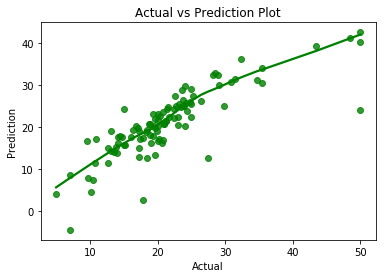

In [29]:
#define final ridge regression RMSE
ridge_pred = r.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, r_pred))
ridge_fin = rmse #for final results

#Ridge regression prediction
print('Ridge regression predictions:')
prediction(r, X_test, y_test)

# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
#define parameters and fit the model
gbr = GradientBoostingRegressor(max_depth = 4, n_estimators = 120, random_state = random_seed)

gbr.fit(X_train, y_train)

gbr_init_pred = gbr.predict(X_test)
gbr_rmse = sqrt(mean_squared_error(y_test, gbr_init_pred))

print('Initial GBR RMSE: {:.3f}'.format(gbr_rmse))

Initial GBR RMSE: 2.308


In [20]:
#find the best # of trees
gbr_errors = [sqrt(mean_squared_error(y_test, gbr_pred))
             for gbr_pred in gbr.staged_predict(X_test)]

best_n_estimators = np.argmin(gbr_errors)

In [21]:
#train updated model with best # of trees
#include warm stop for early stopping logic

gbr_best = GradientBoostingRegressor(max_depth = 4, n_estimators = best_n_estimators, warm_start = True
                                     ,random_state = random_seed)
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=True)

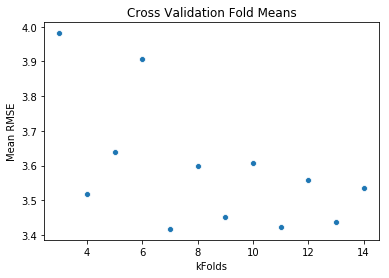

In [24]:
#cross validation
crossval(gbr_best, X_train, y_train, 3, 15)

Gradient Boost Predictions:
RMSE: 2.308


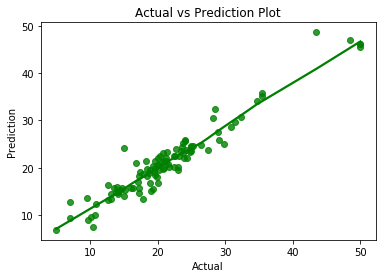

In [34]:
#final predictions
gbr_pred = gbr_best.predict(X_test)
gbr_error = sqrt(mean_squared_error(y_test, gbr_pred))
gbr_fin = gbr_error #for final results

print('Gradient Boost Predictions:')
prediction(gbr_best, X_test, y_test)

Gradient Boost Feature Importance:


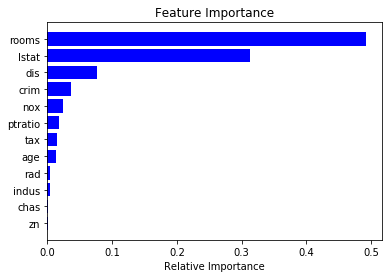

In [35]:
#feature importance
print('Gradient Boost Feature Importance:')
feature(gbr_best)

# Decision Tree

In [36]:
#start by building a decision tree and then move to a random forest
from sklearn.tree import DecisionTreeRegressor

In [37]:
tr = DecisionTreeRegressor(random_state = random_seed)
tr.fit(X_train, y_train)

print('Training set score: {:3f}'.format(tr.score(X_train, y_train)))
print('Test set score: {:3f}'.format(tr.score(X_test, y_test)))

Training set score: 1.000000
Test set score: 0.867970


In [38]:
#model is overfitting, what is the error?
tr_pred = tr.predict(X_test)
mse = mean_squared_error(y_test, tr_pred)
rmse = sqrt(mse)
print('RMSE: {:.3f}'.format(rmse))


RMSE: 3.120


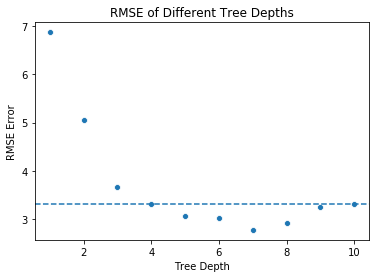

In [39]:
#model is overfitting, what do the different depths look like for error?
depth = []
error = []
for i in range(1,11):
    tree = DecisionTreeRegressor(max_depth = i, random_state = random_seed)
    tree.fit(X_train, y_train)
    ypred = tree.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, ypred))
    error.append(rmse)
    depth.append(i)

sns.scatterplot(x = depth, y = error)
plt.axhline(y=rmse, xmin=0, xmax=11, ls='--')
plt.ylabel('RMSE Error')
plt.xlabel('Tree Depth')
plt.title('RMSE of Different Tree Depths')
plt.show()

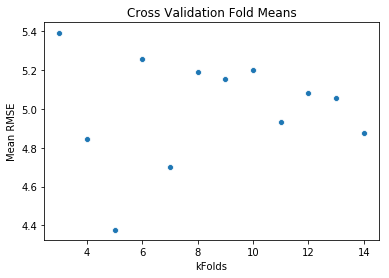

In [40]:
#Model with depth 7 has the lowest error
#update model to match that depth

tr = DecisionTreeRegressor(max_depth=7, random_state = random_seed)
tr.fit(X_train, y_train)

#cross validation
crossval(tr, X_train, y_train, 3, 15)

Decision Tree Predictions:
RMSE: 2.776


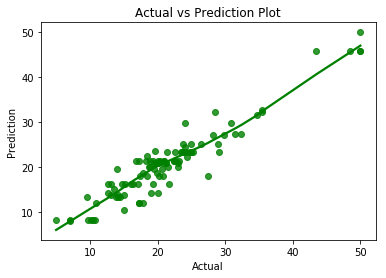

In [41]:
tr_pred = tr.predict(X_test)
tr_error = sqrt(mean_squared_error(y_test, tr_pred))
tr_fin = tr_error #for final results

print('Decision Tree Predictions:')
prediction(tr, X_test, y_test)

Decision Tree Feature Importance:


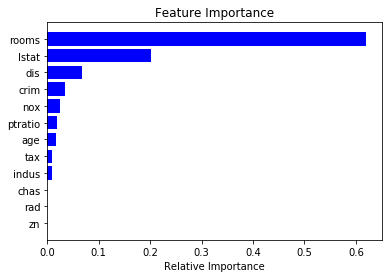

In [51]:
#feature importance
print('Decision Tree Feature Importance:')
feature(tr)

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
#fit initial model
rf = RandomForestRegressor(random_state = random_seed)
rf.fit(X_train, y_train)

print('Training set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

Training set score: 0.973
Test set score: 0.887


In [47]:
#look at error from prediction of initial model
rf_pred = rf.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_pred))

print('Random Forest RMSE: {:.3f}'.format(rf_rmse))

Random Forest RMSE: 2.881


Starting here until the Final Results section the model performance actually gets worse.
The first part uses a randomized search to find the best parameters.
The section after that takes the best parameters from the randomized search to narrow down a grid search.
In both instances the RMSE value worse than the initial fit of the model that does not tweak the parameters at all.

In [40]:
#improve the model by updating the hyperparameters
#first, what parameters are being used now?

print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [58]:
#use random search to improve parameters
n_estimators = [int(i) for i in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(10, 100, num = 5)]
max_depth.append(None)
min_samples_split = [3,7,10]
min_samples_leaf = [1,3,5]
bootstrap = [True, False]

#create final grid for random search
rand_grid = {'n_estimators': n_estimators,
       'max_features': max_features,
       'max_depth': max_depth,
       'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,
       'bootstrap': bootstrap}

print(rand_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [3, 7, 10], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}


In [59]:
rf_search = RandomizedSearchCV(estimator = rf, param_distributions = rand_grid, n_iter = 100, cv = 5, verbose = 2,
                              random_state = random_seed, n_jobs = -1)

In [60]:
#build new model from randomized search values
rf_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [3, 7, 10], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [80]:
rf_search.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 32,
 'bootstrap': False}

RMSE: 2.970


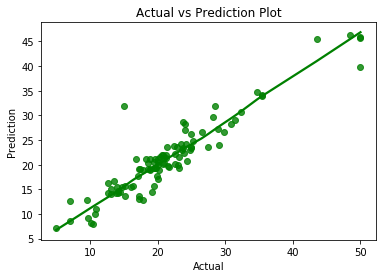

In [18]:
#what is the prediction using the Randomized Search parameters
rf_test = RandomForestRegressor(n_estimators = 700, max_depth = 32, min_samples_leaf = 1, min_samples_split = 3,
                               bootstrap = True, random_state = random_seed)

rf_test.fit(X_train, y_train)
prediction(rf_test, X_test, y_test)

In [85]:
#use random search results to narrow down a grid search

grid = {
    'n_estimators': [600,650,700,750,800],
    'min_samples_split':[2,3,4],
    'min_samples_leaf': [1,2],
    'max_depth': [25,30,32,35,40],
    'bootstrap': [False]
    }

grid_search = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs=-1, verbose = 2)

In [87]:
#train model with grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 12.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [600, 650, 700, 750, 800], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2], 'max_depth': [25, 30, 32, 35, 40], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [88]:
#determine best parameters from grid search
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 700}

In [48]:
#fit final model using best parameters

rf_best = RandomForestRegressor(n_estimators = 700, max_depth = 25, min_samples_leaf = 2, min_samples_split = 2,
                               bootstrap = True, random_state = random_seed)

rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Random Forest Predictions:
RMSE: 3.063


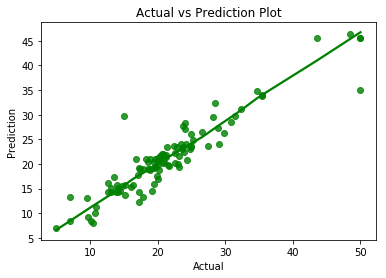

In [49]:
rf_pred = rf_best.predict(X_test)
rf_rmse = sqrt(mean_squared_error(y_test, rf_pred))
rf_fin = rf_rmse #for final results

print('Random Forest Predictions:')
prediction(rf_best, X_test, y_test)

Random Forest Feature Importance:


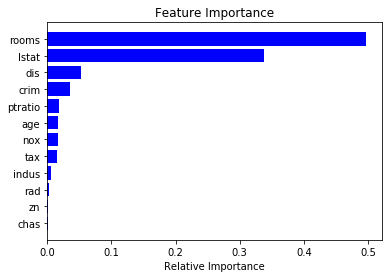

In [50]:
#feature importance
print('Random Forest Feature Importance:')
feature(rf_best)

# Final Results

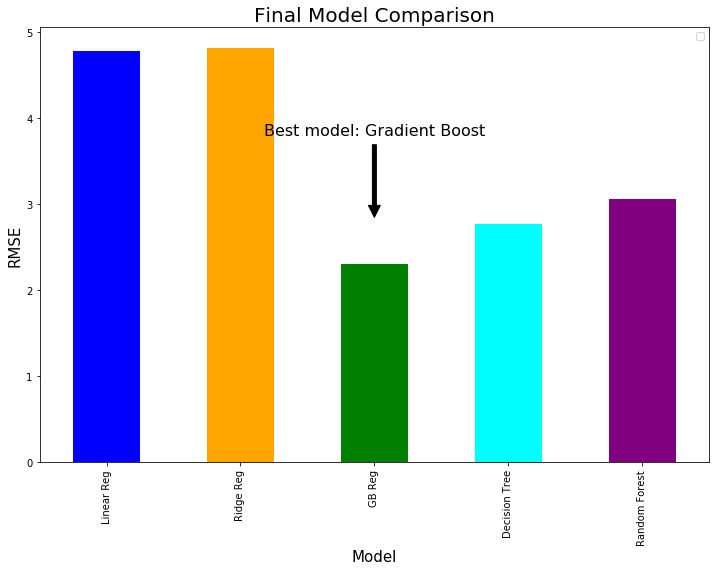

In [55]:
#combine final RMSE for each model and plot against each other for comparison

d = {'Model':['Linear Reg','Ridge Reg','GB Reg','Decision Tree','Random Forest'],
    'RMSE': [lr_fin, ridge_fin, gbr_fin, tr_fin, rf_fin]}

final_data = pd.DataFrame(data = d)

color = ['blue','orange','green','cyan','purple']
best_model = final_data[final_data['Model']=='GB Reg']
xplot = best_model['Model']
yplot = best_model['RMSE']


final_data.plot.bar(x = 'Model',y = 'RMSE', color = color, figsize = (12,8), label = '_nolegend_')
plt.annotate('Best model: Gradient Boost',
             xy=(2, 2.8),
             xytext=(2, 2.8 + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.xlabel('Model', size = 15)
plt.ylabel('RMSE', size = 15)
plt.title('Final Model Comparison', size = 20)
plt.show()

Full Data Prediction - Using Gradient Boosting:
RMSE: 1.240


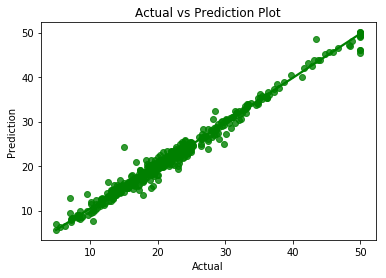

In [56]:
#perform gradient boost model on entire dataset
#will use prediction function

print('Full Data Prediction - Using Gradient Boosting:')
prediction(gbr_best, X, y)